In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
sys.path.append("..")
from partition import *
from constants import *
from opacity import *
from pe_iter import *

In [2]:
plt.style.use('../../scripts/atmospheres.mplstyle')


Bad key "xticks.labelsize" on line 11 in
../../scripts/atmospheres.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "yticks.labelsize" on line 12 in
../../scripts/atmospheres.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#### read in VALIIIC file in aux_files 

df_val = pd.read_csv(r'../aux_files/VALIIIC.txt', skiprows=[0,1,2,5], delim_whitespace=True, dtype=float)

In [4]:
# using your Φ function for hydrogen and the electron gas pressure implied by ne and T in the VALiiiC
# atmosphere, reproduce the top part of Figure 8.8 (which comes fromthe VALIII paper).  

# plot log(n) for n_e and n_p vs height 

# how do you get n_p here

In [5]:
Pgas_val = df_val['Ptotal'].values * df_val['Pgas/Ptotal'].values  

In [6]:
T_val = df_val['T'].values

In [7]:
Pe_calc_array = []
Pe_ideal_array = []
for i in range(len(T_val)):
    Pgas = Pgas_val[i]
    T = T_val[i]
    n_e = df_val['n_e'].values[i]
    Pe = Pe_iter(T, Pgas)
    Pe_calc_array.append(Pe)
    Pe_ideal_array.append(n_e*BOLTZMANN_ERG*T)

C:\Users\Belles\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [8]:
Pe_calc_array = np.array(Pe_calc_array)
Pe_ideal_array = np.array(Pe_ideal_array)

In [9]:
phi_array = [phi('H', T) for T in T_val]

In [10]:
n_p = phi_array/Pe_ideal_array*df_val['n_H'].values

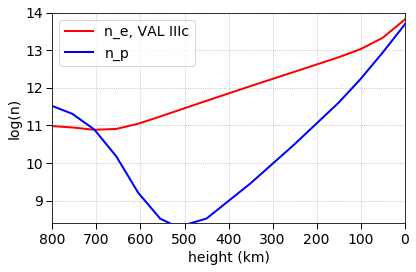

In [11]:
plt.plot(df_val['h'].values, np.log10(df_val['n_e'].values), 'r-', label='n_e, VAL IIIc')
plt.plot(df_val['h'].values, np.log10(n_p), 'b-', label='n_p')
plt.xlabel('height (km)')
plt.ylabel('log(n)')
plt.xlim([800, 0])
plt.ylim([8.4, 14])
plt.legend()
plt.savefig('prob18_density_heighy.pdf')

In [12]:
# fix the above to use Pe = n_e k T

In [13]:
# part c
# plot contribution to ne on y-axis vs height
# for species Fe Mg Si

# fix using josephs help, see eq 9.8 in Gray

In [14]:
phi_fe_array = [phi('Fe', T) for T in T_val]
phi_mg_array = [phi('Mg', T) for T in T_val]
phi_si_array = [phi('Si', T) for T in T_val]

In [15]:
# abundance A = n_x/n_H

In [16]:
A_fe = 2.75e-5
A_mg = 3.80e-5
A_si = 3.55e-5

In [17]:
n_fe = np.array(phi_fe_array)/Pe_calc_array*A_fe*df_val['n_H'].values/(1+np.array(phi_fe_array)/Pe_calc_array)
n_mg = np.array(phi_mg_array)/Pe_calc_array*A_mg*df_val['n_H'].values/(1+np.array(phi_mg_array)/Pe_calc_array)
n_si = np.array(phi_si_array)/Pe_calc_array*A_si*df_val['n_H'].values/(1+np.array(phi_si_array)/Pe_calc_array)
n_h_e = np.asarray(phi_array)/Pe_calc_array*df_val['n_H'].values/(1+np.asarray(phi_array)/Pe_calc_array)

In [18]:
h_cont = n_h_e/df_val['n_e'].values
fe_cont = n_fe/df_val['n_e'].values
mg_cont = n_mg/df_val['n_e'].values
si_cont = n_si/df_val['n_e'].values

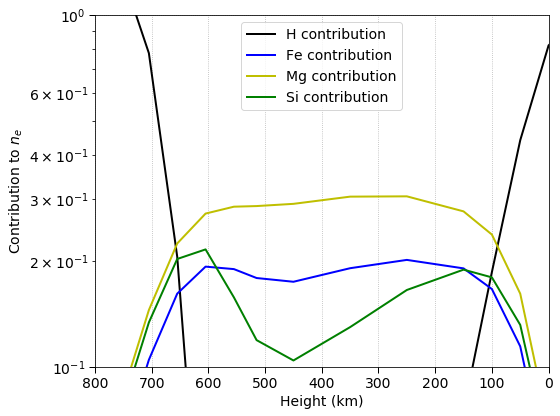

In [19]:
plt.figure(figsize=(8,6))
plt.plot(df_val['h'].values, h_cont, 'k-', label='H contribution')
plt.plot(df_val['h'].values, fe_cont, 'b-', label='Fe contribution')
plt.plot(df_val['h'].values, mg_cont, 'y-', label='Mg contribution')
plt.plot(df_val['h'].values, si_cont, 'g-', label='Si contribution')
plt.xlabel('Height (km)')
plt.ylabel(r'Contribution to $n_e$')
plt.xlim([800, 0])
plt.ylim([0.1,1])
plt.yscale('log')
plt.legend()
plt.savefig('contribution_to_e_wrong.pdf')

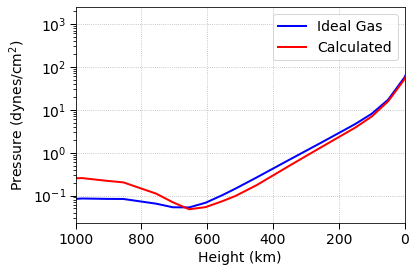

In [20]:
# problem 19

plt.plot(df_val['h'].values, Pe_ideal_array, 'b-', label='Ideal Gas')
plt.plot(df_val['h'].values, Pe_calc_array, 'r-', label='Calculated')
plt.xlabel("Height (km)")
plt.ylabel(r'Pressure (dynes/cm$^2$)')
plt.legend()
plt.xlim([1000,0])
plt.yscale('log')
plt.savefig("pressure_comp.pdf")

In [21]:
# calculate total continuous opacity 
# kappa(Pe, Pgas, T, wave, A_array)

In [22]:
df = pd.read_csv(r'..\aux_files\SolarAbundance.txt', sep='\t')
df = df.dropna()
df = df[(df['element'] != 'Li') & (df['element'] !='Cs')] 
A_array = 10**(df['logA'].values)

In [23]:
kappa(57, 1.13e5, 6420, 5000, A_array)/2.27e-24

0.6901918004247123

In [24]:
kappa(10**(2.76), 1259, 11572, 1.5e4, A_array)/2.27e-24

75.05658598498685

In [27]:
# calculate kappa 500 nm as a function of optical depth

In [29]:
kappa_500 = [kappa(Pe_calc_array[i], Pgas_val[i], T_val[i], 5000, A_array)/2.27e-24 for i in range(len(Pe_calc_array))]

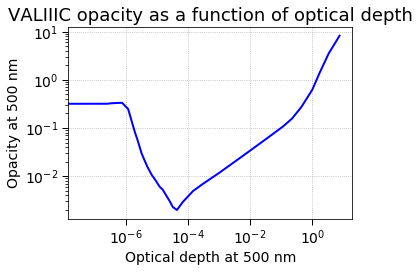

In [33]:
plt.plot(df_val['tau_500'], kappa_500, 'b-', label='VAL III C opacity')
plt.xlabel('Optical depth at 500 nm')
plt.ylabel('Opacity at 500 nm')
plt.xscale('log')
plt.yscale('log')
plt.title('VALIIIC opacity as a function of optical depth')
plt.savefig('continuous_opacity.pdf')

In [34]:
# assuming hydrostatic equilibrium

In [35]:
dtau = np.diff(df_val['tau_500'].values)
dP = np.diff(df_val['Ptotal'].values)

In [40]:
opacity_hydrostatic = 10**(4.4377)*dtau/dP

In [41]:
opacity_hydrostatic

array([3.38989864e-01, 3.52049010e-01, 2.86022698e-01, 3.15748237e-01,
       3.86295023e-01, 2.89721267e-01, 3.19857758e-01, 3.00147275e-01,
       2.91319414e-01, 3.01364911e-01, 2.95992988e-01, 2.93537251e-01,
       2.84505336e-01, 3.05278742e-01, 3.10497182e-01, 2.43527201e-01,
       2.14608346e-01, 2.31350841e-01, 1.92831394e-01, 1.80818947e-01,
       1.63758206e-01, 1.54179921e-01, 1.36080859e-01, 1.18381278e-01,
       9.93956272e-02, 6.96869758e-02, 4.23761567e-02, 2.66133858e-02,
       1.73814195e-02, 1.08661305e-02, 7.25748165e-03, 5.60296609e-03,
       4.88740287e-03, 4.36464169e-03, 3.96981928e-03, 3.34057759e-03,
       2.72516615e-03, 2.63117880e-03, 3.48390906e-03, 5.99991734e-03,
       9.69655388e-03, 1.59003709e-02, 2.98585713e-02, 5.70965562e-02,
       1.04193685e-01, 1.58137072e-01, 2.43354662e-01, 4.41878905e-01,
       9.61264609e-01, 2.19042129e+00, 5.23342787e+00])

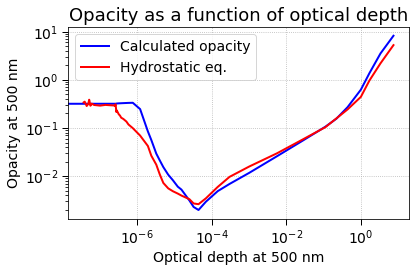

In [44]:
plt.plot(df_val['tau_500'], kappa_500, 'b-', label='Calculated opacity')
plt.plot(df_val['tau_500'][1:], opacity_hydrostatic, 'r-', label='Hydrostatic eq.')
plt.xlabel('Optical depth at 500 nm')
plt.ylabel('Opacity at 500 nm')
plt.xscale('log')
plt.yscale('log')
plt.title('Opacity as a function of optical depth')
plt.legend()
plt.savefig('continuous_opacity.pdf')